# Week 4 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Linear models for classification

**ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0**

For linear models for classification, the decision boundary is a linear function of the input. In other words, a (binary) linear classifier is a classifier that separates two classes using a line, a plane, or a hyperplane.

There are many algorithms for learning linear models. These algorithms all differ in the following two ways:

- The way in which they measure how well a particular combination of coefficients and intercept fits the training data

- If and what kind of regularization

/Users/saurbina/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/saurbina/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


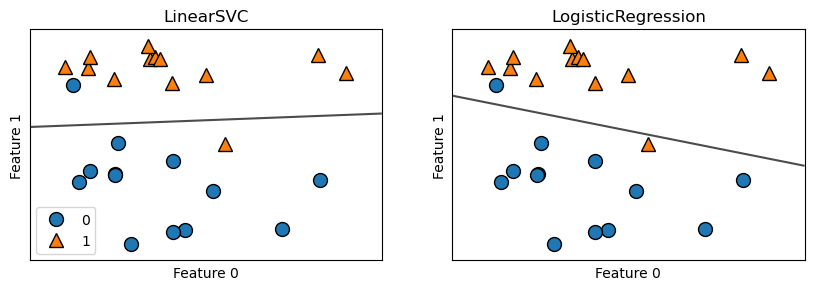

In [16]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC 
import mglearn

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes): 
    clf = model.fit(X, y) 
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax =ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    axes[0].legend()

In other words, any new data point that lies above the black line will be classified as class 1 by the respective classifier, while any point that lies below the black line will be classified as class 0.